En esta práctica vamos a predecir el precio del airbnb, utilizando los datos disponibles. (Problema de regresión).

In [1]:
#1)CARGO LAS LIBRERIAS NECESARIAS:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

Para no contaminar mis datos antes de hacer el análisis y preprocesamiento de los mismos, los voy a dividir en 2 dataset, uno de training y otro de test.

In [2]:
#2)CARGO LOS DATOS Y LOS DIVIDO EN TRAIN/TEST:

from sklearn.model_selection import train_test_split

full_df = pd.read_csv('C:/Users/vero/Desktop/BOOTCAMP9/machine-learning/project/airbnb-listings (3).csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('C:/Users/vero/Desktop/BOOTCAMP9/machine-learning/project/train.csv', sep=';', decimal='.', index=False)
test.to_csv('C:/Users/vero/Desktop/BOOTCAMP9/machine-learning/project/test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('C:/Users/vero/Desktop/BOOTCAMP9/machine-learning/project/train.csv', sep=';', decimal='.')


Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


3.ANÁLISIS EXPLORATORIO DE EL DATASET DE TRAIN:

In [3]:
df.head().T

,0,1,2,3,4
ID,11584780,12668401,3093756,14065306,17309526
Listing Url,https://www.airbnb.com/rooms/11584780,https://www.airbnb.com/rooms/12668401,https://www.airbnb.com/rooms/3093756,https://www.airbnb.com/rooms/14065306,https://www.airbnb.com/rooms/17309526
Scrape ID,20170407214119,20170407214050,20170407214119,20170407214119,20170407214050
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,STUDIO BRASIL DECO,Ramblas Studio C,Apartamento - Zona centro,PE6 Habitación Privada en Madrid 2 Personas +WIFI,Double room in Gracia/Whole Apartment
...,...,...,...,...,...
Cancellation Policy,moderate,strict,flexible,strict,flexible
Calculated host listings count,29.0,92.0,1.0,6.0,1.0
Reviews per Month,0.18,0.16,NaN,2.21,NaN
Geolocation,"40.45601889458499,-3.693480154123377","41.385585372615715,2.1719518873888717","40.405648383247076,-3.7016207877920073","40.411074047208,-3.7383747831501863","41.40132396962952,2.163712769014997"


In [4]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [5]:
df.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [6]:
df.isnull().any()

ID                                False
Listing Url                       False
Scrape ID                         False
Last Scraped                      False
Name                              False
                                  ...  
Cancellation Policy               False
Calculated host listings count     True
Reviews per Month                  True
Geolocation                       False
Features                           True
Length: 89, dtype: bool

In [7]:
df.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10293.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11785.000000,...,11824.000000,9165.000000,9144.000000,9150.000000,9137.000000,9150.000000,9134.000000,9134.000000,11821.000000,9281.000000
mean,1.028556e+07,2.017038e+13,3.612587e+07,94.760031,12.378648,12.378648,40.477024,-3.771006,3.263616,1.276071,...,22.667118,91.682270,9.419619,9.323716,9.620444,9.652240,9.535691,9.217648,9.402589,1.874634
std,5.566178e+06,5.427286e+08,3.437433e+07,15.358842,33.842400,33.842400,4.851770,14.246958,2.085407,0.649400,...,38.519203,9.058884,0.918470,0.989681,0.801822,0.758486,0.755712,0.952347,23.459172,1.872500
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.544594e+06,2.017041e+13,6.787360e+06,99.000000,1.000000,1.000000,40.409756,-3.707620,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.136483e+07,2.017041e+13,2.461869e+07,100.000000,2.000000,2.000000,40.419525,-3.700787,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.533143e+07,2.017041e+13,5.434329e+07,100.000000,5.000000,5.000000,40.430916,-3.683843,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.810000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


Represento los histogramas de algunos atributos para entender mejor los datos:

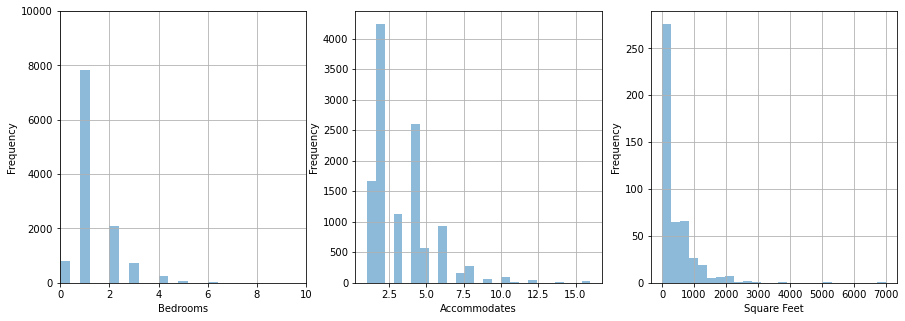

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 10, 0, 10000])
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
df['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

plt.subplot(1,3,3)
df['Square Feet'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Square Feet')

plt.show()

In [ ]:
Hacieno los histogramas logarítmicos podemos ver los datos más claros, pues aquí están un poco escorados.

Ahora los represento junto al precio, para buscar posibles outliers.

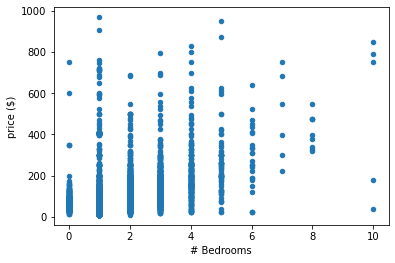

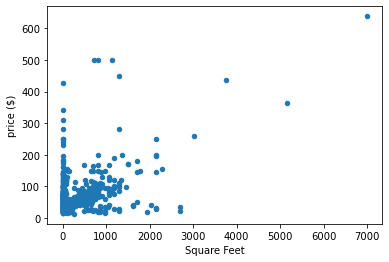

In [9]:
df.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('price ($)')
plt.show()

df.plot(kind = 'scatter',x='Square Feet',y = 'Price')
plt.xlabel('Square Feet')
plt.ylabel('price ($)')
plt.show()


Vamos a echar un ojo a la correlación:

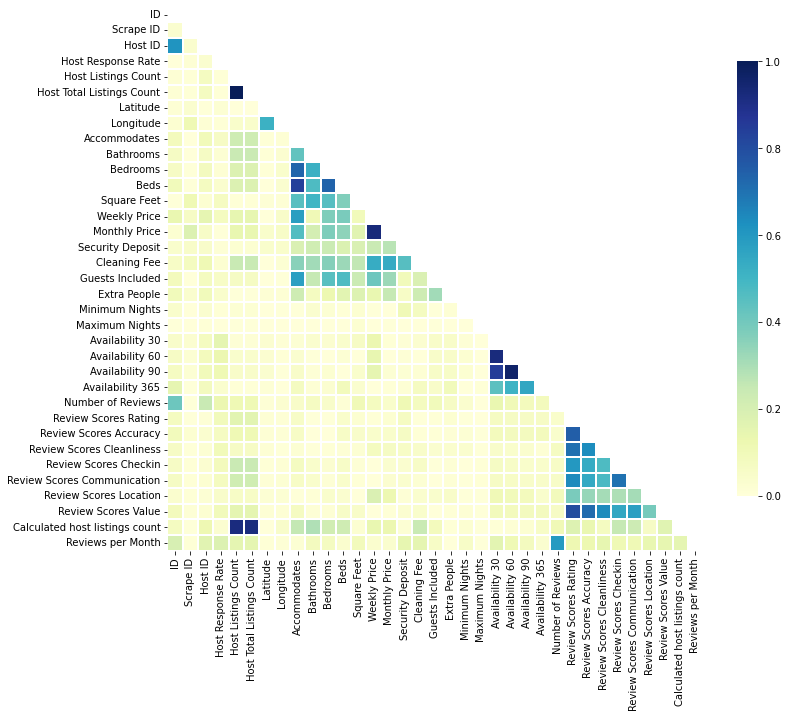

In [10]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

4.PREPROCESAMIENTO:
    Con todo lo visto anteriormente debemos hacer el siguiente preprocesamiento a los datos:
    a)Eliminar variables que no me aportan o no puedo codificar.
    b)Eliminar variables con alto porcentaje de missings e imputar valores ausentes en las que no tienen un porcentaje mayor del         50% de missings.
    c)Codificar variables categóricas.
    d)Eliminar outliers.
    e)Eliminar variables con una correlación alta.
    f)Generar variables nuevas que me puedan ayudar.

a)Elimino variables que no me aportan nada, o no puedo codificar:

In [11]:
df = df.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 
       'Neighbourhood Group Cleansed',  'State',  'Market',
       'Smart Location', 'Country Code', 'Country', 
       
        'Bed Type', 'Amenities',  'Weekly Price',
       'Monthly Price',  'Cleaning Fee', 
        'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'First Review', 'Last Review',
        'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names',
        'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features' ], axis=1)

In [12]:
df.columns

Index(['Neighbourhood Cleansed', 'City', 'Zipcode', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Square Feet', 'Price', 'Security Deposit', 'Guests Included',
       'Extra People', 'Review Scores Rating', 'Cancellation Policy'],
      dtype='object')

In [13]:
#Echo un vistazo a los datos de City
df["City"].value_counts()

Madrid              10575
Barcelona             220
London                103
Paris                  91
马德里                    41
                    ...  
Kimmage                 1
Ixelles                 1
Woolloomooloo           1
Port de Pollença        1
Berlín                  1
Name: City, Length: 219, dtype: int64

La mayoria de los datos son de Madrid, así que me quedaré sólo con los datos de Madrid y elimino la columna city

In [14]:
df = df.drop(df[df['City']!= "Madrid"].index)

In [15]:
df["City"].value_counts()

Madrid    10575
Name: City, dtype: int64

In [16]:
df = df.drop(['City'], axis=1)

In [17]:
#Echo un vistazo a Zipcode
df["Zipcode"].value_counts()

28012           1649
28004           1439
28005            977
28013            803
28014            510
                ... 
2804               1
28051\n28051       1
28850              1
Madrid 28004       1
20013              1
Name: Zipcode, Length: 72, dtype: int64

Podria limpiar los codigos postales que no empiecen por 28

In [19]:
df.Zipcode[("^28",df.Zipcode)]<-NA

KeyError: 'key of type tuple not found and not a MultiIndex'

b)Eliminar con alto porcentaje de missings e imputar valores ausentes en las que no tienen un porcentaje mayor del 50% de missings.

In [18]:
df.isnull().any()

Neighbourhood Cleansed    False
Zipcode                    True
Latitude                  False
Longitude                 False
Property Type             False
Room Type                 False
Accommodates              False
Bathrooms                  True
Bedrooms                   True
Beds                       True
Square Feet                True
Price                      True
Security Deposit           True
Guests Included           False
Extra People              False
Review Scores Rating       True
Cancellation Policy       False
dtype: bool

In [19]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(na_ratio)

Square Feet               96.104019
Security Deposit          57.758865
Review Scores Rating      21.739953
Zipcode                    3.394799
Beds                       0.340426
Bathrooms                  0.321513
Bedrooms                   0.170213
Price                      0.066194
Extra People               0.000000
Guests Included            0.000000
Neighbourhood Cleansed     0.000000
Accommodates               0.000000
Room Type                  0.000000
Property Type              0.000000
Longitude                  0.000000
Latitude                   0.000000
Cancellation Policy        0.000000
dtype: float64


Al tener más de un 50% de valores missing en las columnas de Square Feet y Security Deposit las podemos eliminar directamente:

In [20]:
df = df.drop(['Square Feet', 'Security Deposit'], axis=1)

En las variables numericas relleno estos datos con la media y en las variables categoricas los relleno con la moda:

In [21]:
#VARIABLES NUMÉRICAS

df['Price'].fillna(df['Price'].mean(), inplace=True)
print("valores perdidos en Price: " + 
      str(df['Price'].isnull().sum()))

df['Bedrooms'].fillna(df['Bedrooms'].mean(), inplace=True)
print("valores perdidos en Bedrooms: " + 
      str(df['Bedrooms'].isnull().sum()))

df['Beds'].fillna(df['Beds'].mean(), inplace=True)
print("valores perdidos en Beds: " + 
      str(df['Beds'].isnull().sum()))

df['Bathrooms'].fillna(df['Bathrooms'].mean(), inplace=True)
print("valores perdidos en Bathrooms : " + 
      str(df['Bathrooms'].isnull().sum()))

df['Review Scores Rating'].fillna(df['Review Scores Rating'].mean(), inplace=True)
print("Valores perdidos en Review Scores Rating : " + 
      str(df['Review Scores Rating'].isnull().sum()))

#VARIABLES CATEGÓRICAS

df['Zipcode'].fillna(df['Zipcode'].mode()[0], inplace=True)
print("Valores perdidos en Zipcode: " + 
      str(df['Zipcode'].isnull().sum()))




valores perdidos en Price: 0
valores perdidos en Bedrooms: 0
valores perdidos en Beds: 0
valores perdidos en Bathrooms : 0
Valores perdidos en Review Scores Rating : 0
Valores perdidos en Zipcode: 0


c)Codifico variables categóricas

In [22]:
df.dtypes

Neighbourhood Cleansed     object
Zipcode                    object
Latitude                  float64
Longitude                 float64
Property Type              object
Room Type                  object
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Price                     float64
Guests Included             int64
Extra People                int64
Review Scores Rating      float64
Cancellation Policy        object
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

le_Neighbourhood_Cleansed = LabelEncoder()
le_Neighbourhood_Cleansed.fit(df['Neighbourhood Cleansed'])
df['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed.transform(df['Neighbourhood Cleansed'])

le_Zipcode  = LabelEncoder()
le_Zipcode .fit(df['Zipcode'])
df['Zipcode'] = le_Zipcode.transform(df['Zipcode'])

le_Property_Type = LabelEncoder()
le_Property_Type.fit(df['Property Type'])
df['Property Type'] = le_Property_Type.transform(df['Property Type'])

le_Room_Type = LabelEncoder()
le_Room_Type.fit(df['Room Type'])
df['Room Type'] = le_Room_Type.transform(df['Room Type'])

le_Cancellation_Policy = LabelEncoder()
le_Cancellation_Policy.fit(df['Cancellation Policy'])
df['Cancellation Policy'] = le_Cancellation_Policy.transform(df['Cancellation Policy'])

In [ ]:
d)Eliminar outliers.Vamos a crear filtros para eliminarlos:

In [24]:
df["Bedrooms"].value_counts()

1.000000     7158
2.000000     1861
0.000000      734
3.000000      589
4.000000      152
5.000000       41
1.290329       18
6.000000        9
8.000000        5
10.000000       4
7.000000        4
Name: Bedrooms, dtype: int64

Para más de 6 habitaciones empieza a ser una anomalia

In [25]:
df_filtered = df[df['Bedrooms'] <= 6]

In [26]:
df_filtered['Bedrooms'].value_counts()

1.000000    7158
2.000000    1861
0.000000     734
3.000000     589
4.000000     152
5.000000      41
1.290329      18
6.000000       9
Name: Bedrooms, dtype: int64

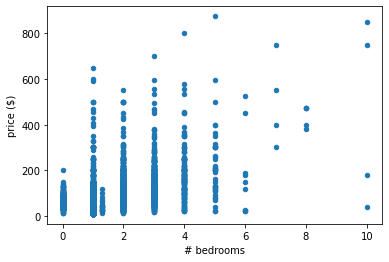

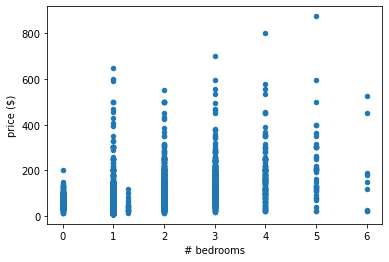

In [27]:
df.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

df_filtered.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

In [28]:
print(f'Original: {df.shape[0]}\nFiltered: {df_filtered.shape[0]}')
print(f'Diferencia: {(df.shape[0] - df_filtered.shape[0])/df.shape[0]*100}%')

Original: 10575
Filtered: 10562
Diferencia: 0.12293144208037825%


La diferencia no es muy grande lo aceptamos

In [29]:
df = df_filtered

e)Eliminar variables con una correlación alta.

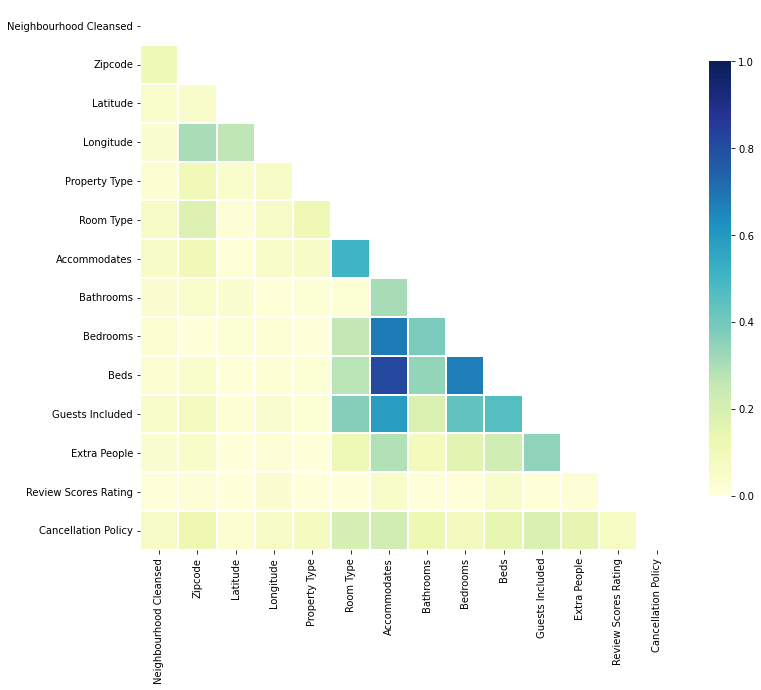

In [30]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Observamos una alta correlación entre Beds y Accommodates

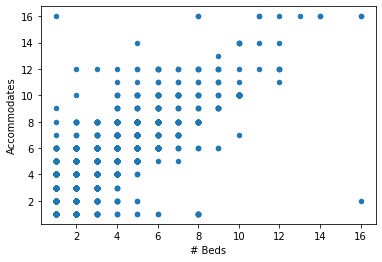

In [31]:
df.plot(kind = 'scatter',x='Beds',y = 'Accommodates')
plt.xlabel('# Beds')
plt.ylabel('Accommodates')
plt.show()

Beds y Accommodates logicamente están muy correlacionadas, podemos eliminar cualquiera de ellas:

In [32]:
df = df.drop(['Beds'], axis=1)

f)Generar variables nuevas que me puedan ayudar.

In [33]:
df['bedrooms_squared'] = df['Bedrooms'].apply(lambda x: x**2)
df['bed_bath_rooms']  = df['Bedrooms']*df['Bathrooms']

In [34]:
df.columns

Index(['Neighbourhood Cleansed', 'Zipcode', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Price', 'Guests Included', 'Extra People', 'Review Scores Rating',
       'Cancellation Policy', 'bedrooms_squared', 'bed_bath_rooms'],
      dtype='object')

4)MODELADO

Vamos a colocar nuestra variable de estudio Price en primera posición:

In [35]:
df = df.reindex(columns=['Price','Neighbourhood Cleansed', 'Zipcode', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms','Guests Included', 'Extra People', 'Review Scores Rating',
       'Cancellation Policy', 'bedrooms_squared', 'bed_bath_rooms'])

In [36]:
df.columns

Index(['Price', 'Neighbourhood Cleansed', 'Zipcode', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Guests Included', 'Extra People', 'Review Scores Rating',
       'Cancellation Policy', 'bedrooms_squared', 'bed_bath_rooms'],
      dtype='object')

In [37]:
#CONVERTIMOS EL DATAFRAME AL FORMATO NECESARIO PARA SCIKIT-LEARN

from sklearn import preprocessing

data = df.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [38]:
#CARGAMOS LOS DATOS DE EVALUACION:

df_test = pd.read_csv('C:/Users/vero/Desktop/BOOTCAMP9/machine-learning/project/test.csv', sep=';', decimal='.')

# LE APLICAMOS LAS MISMAS TRANSFORMACIONES QUE A TRAIN:

#1.ELIMINO LAS VARIABLES POR APORTAR POCO O SER DIFICILMENTE CODIFICABLES:
df_test = df_test.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 
       'Neighbourhood Group Cleansed',  'State',  'Market',
       'Smart Location', 'Country Code', 'Country', 
       
        'Bed Type', 'Amenities',  'Weekly Price',
       'Monthly Price',  'Cleaning Fee', 
        'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'Number of Reviews', 'First Review', 'Last Review',
        'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names',
        'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features' ], axis=1)

#2.ME QUEDO CON LOS DATOS DE MADRID:
df_test = df_test.drop(df_test[df_test['City']!= "Madrid"].index)

#3.elimino City:
df_test = df_test.drop(['City'], axis=1)

#4.Elimino Square Feet y Security Depost por tener más del 50% de valores nulos:

df_test =df_test.drop(['Square Feet', 'Security Deposit'], axis=1)

#5.Imputo valores ausentes:
#VARIABLES NUMÉRICAS

df_test['Price'].fillna(df_test['Price'].mean(), inplace=True)
print("valores perdidos en Price: " + 
      str(df_test['Price'].isnull().sum()))

df_test['Bedrooms'].fillna(df_test['Bedrooms'].mean(), inplace=True)
print("valores perdidos en Bedrooms: " + 
      str(df_test['Bedrooms'].isnull().sum()))

df_test['Beds'].fillna(df_test['Beds'].mean(), inplace=True)
print("valores perdidos en Beds: " + 
      str(df_test['Beds'].isnull().sum()))

df_test['Bathrooms'].fillna(df_test['Bathrooms'].mean(), inplace=True)
print("valores perdidos en Bathrooms : " + 
      str(df_test['Bathrooms'].isnull().sum()))

df_test['Review Scores Rating'].fillna(df_test['Review Scores Rating'].mean(), inplace=True)
print("Valores perdidos en Review Scores Rating : " + 
      str(df_test['Review Scores Rating'].isnull().sum()))

#VARIABLES CATEGÓRICAS

df_test['Zipcode'].fillna(df_test['Zipcode'].mode()[0], inplace=True)
print("Valores perdidos en Zipcode: " + 
      str(df_test['Zipcode'].isnull().sum()))

#6.CODIFICO VARIABLES CATEGORICAS
from sklearn.preprocessing import LabelEncoder

le_Neighbourhood_Cleansed = LabelEncoder()
le_Neighbourhood_Cleansed.fit(df_test['Neighbourhood Cleansed'])
df_test['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed.transform(df_test['Neighbourhood Cleansed'])

le_Zipcode  = LabelEncoder()
le_Zipcode .fit(df_test['Zipcode'])
df_test['Zipcode'] = le_Zipcode.transform(df_test['Zipcode'])

le_Property_Type = LabelEncoder()
le_Property_Type.fit(df_test['Property Type'])
df_test['Property Type'] = le_Property_Type.transform(df_test['Property Type'])

le_Room_Type = LabelEncoder()
le_Room_Type.fit(df_test['Room Type'])
df_test['Room Type'] = le_Room_Type.transform(df_test['Room Type'])

le_Cancellation_Policy = LabelEncoder()
le_Cancellation_Policy.fit(df_test['Cancellation Policy'])
df_test['Cancellation Policy'] = le_Cancellation_Policy.transform(df_test['Cancellation Policy'])

#Filtro para eliminar outliers:
df_test_filtered = df_test[df_test['Bedrooms'] <= 6]
df_test = df_test_filtered

#Elimino Beds por alta correlación con Accomodates:
df_test = df_test.drop(['Beds'], axis=1)

#Genero variables nuevas:

df_test['bedrooms_squared'] = df_test['Bedrooms'].apply(lambda x: x**2)
df_test['bed_bath_rooms']  = df_test['Bedrooms']*df_test['Bathrooms']



#CONVERTIMOS EL DATAFRAME AL FORMATO NECESARIO PARA SCIKIT-LEARN

data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

valores perdidos en Price: 0
valores perdidos en Bedrooms: 0
valores perdidos en Beds: 0
valores perdidos en Bathrooms : 0
Valores perdidos en Review Scores Rating : 0
Valores perdidos en Zipcode: 0


1º)ÁRBOL DE DECISIÓN (Buena interpretabilidad y poca precisión)

best mean cross-validation score: 0.502
best parameters: {'max_depth': 7}


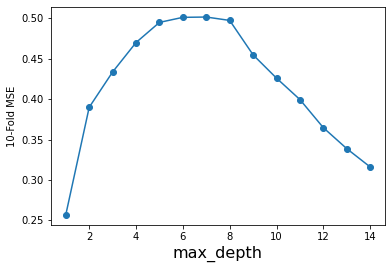

In [39]:
#IMPORTAMOS DECISSIONTREEREGRESSOR

from sklearn.tree import DecisionTreeRegressor
#LE APLICAMOS CROSS VALIDATION
from sklearn.model_selection import GridSearchCV
from sklearn import tree


maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

Encontramos el máximo en 7, pero en 5-6-7 apenas cambia la MSE, Así que me quedo con 5 para disminuir la complejidad y evitar el overfiting.

In [41]:
maxDepthOptimo = 5 #grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.5617181471468757
Test:  -3.6028199854702097


!!!!!En test obtenemos un valor negativo!!!!!!!!!

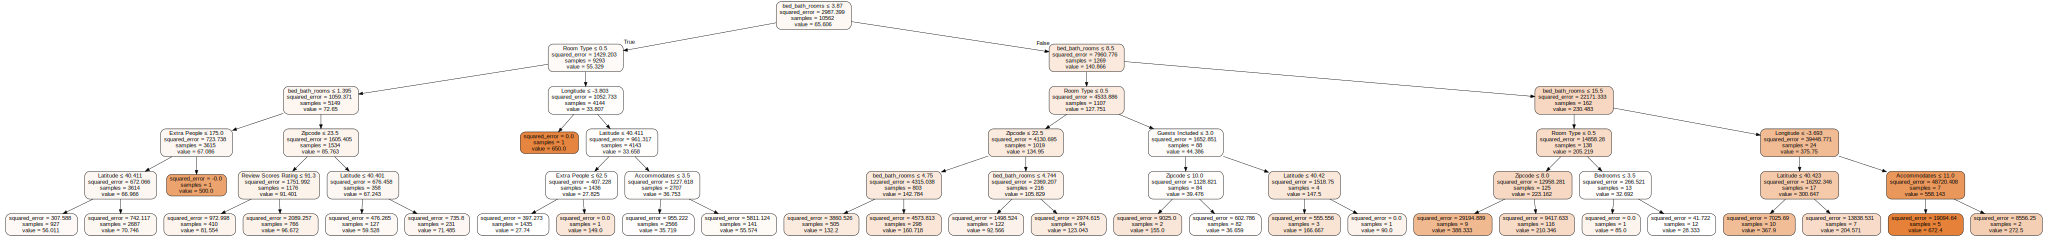

In [42]:
from sklearn.tree import export_graphviz
import graphviz

tree_dot = export_graphviz(treeModel, out_file=None, feature_names=feature_names,  
                         filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(tree_dot) 
graph

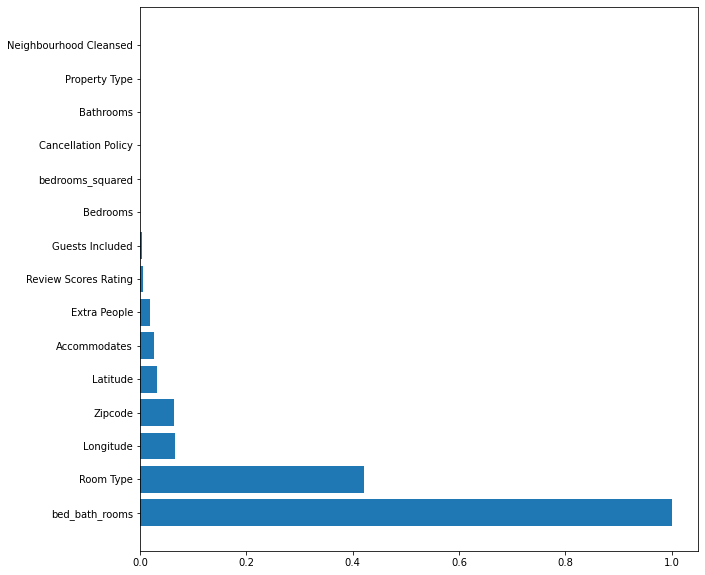

In [43]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Encontramos que las variables que tienen más peso en el precio son baños por habitación y tipo de habitación y no todas tienen influencia.

B) RANDOM FOREST
Es mucho más potente, al ensamblar muchos árboles ganamoss mucha precisión pero perdemos en interpretabilidad. Nos da una medida de la importancia de cada variable.

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.4s
[CV] END .......................................

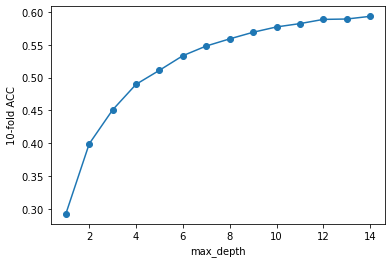

In [44]:
#CREACION Y ENTRENAMIENTO DEL MODELO

from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth} #  {'max_depth': maxDepth, 'n_estimators': [100, 200, 500, 1000]}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), 
                    param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

Encontramos el máximo en 14 pero el MSE de 12 es practicamente igual, asi que elegimos 12.

In [47]:
maxDepthOptimo = 12 #grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.796834203057842
Test:  -1.0209771536019168


Obtenemos mejores resultados, pero de nuevo test es negativo!!!!!

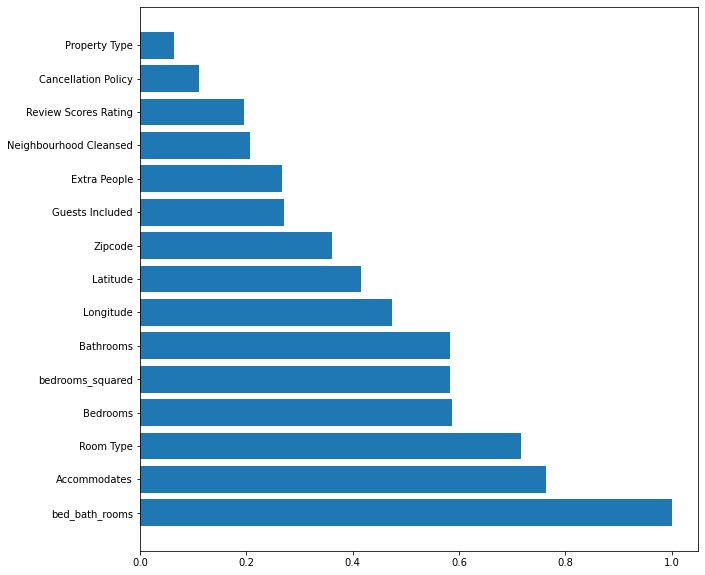

In [48]:
#CARACTERISTICAS MAS RELEVANTES

importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Aqui podemos ver que todas las varibles influyen.

In [49]:
#HAGO SELECCION DE CARACTERISTICAS

from sklearn.model_selection import KFold

N,Nfeatures = X_train.shape

rf = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt')
kf  = KFold(n_splits=10, shuffle = True, random_state=1)
cv_error = []
cv_std = []

for nfeatures in range(Nfeatures,0,-1):
        
    error_i = []
    
    for idxTrain, idxVal in kf.split(X_train):
        
        Xt = X_train[idxTrain,:]
        yt = y_train[idxTrain]
        Xv = X_train[idxVal,:]
        yv = y_train[idxVal]
        
        rf.fit(Xt,yt)
        
        ranking = rf.feature_importances_
        indices = np.argsort(ranking)[::-1] 
    
        selected = indices[0:(Nfeatures-nfeatures+1)]
        
        Xs = Xt[:,selected]
        
        rf.fit(Xs,yt)
        error = (1.0-rf.score(Xv[:,selected],yv))     
        error_i.append(error) 
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str(len(selected)) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

# features 1 error 0.669363531512251 +/- 0.025474006591509585
# features 2 error 0.5393020259505156 +/- 0.0377617302235356
# features 3 error 0.5089866148247794 +/- 0.03414096425812175
# features 4 error 0.5155940823356595 +/- 0.021210723756162474
# features 5 error 0.5117677987894171 +/- 0.025909585384079736
# features 6 error 0.5078475329279882 +/- 0.02826489175939999
# features 7 error 0.4811943220023152 +/- 0.04802108041619061
# features 8 error 0.46157119028849236 +/- 0.04711683410229373
# features 9 error 0.4618118704304391 +/- 0.05105777615598969
# features 10 error 0.44094901671615494 +/- 0.05581651926969189
# features 11 error 0.4266632757447719 +/- 0.050530188630176255
# features 12 error 0.42418390259350663 +/- 0.046935494865129976
# features 13 error 0.41888358832808875 +/- 0.04402039806207702
# features 14 error 0.4156355412245067 +/- 0.04092240715598088
# features 15 error 0.4167704013273081 +/- 0.04365122865177528


In [50]:
#BUSQUEDA DE PARAMETROS LIBRES

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Lasso

tscv = TimeSeriesSplit(n_splits=3)

alpha_vector = np.logspace(-4,4,20)
param_grid = {'alpha': alpha_vector}

grid = GridSearchCV(Lasso(), param_grid=param_grid, cv = tscv.split(X_train)).fit(X_train, y_train)

best mean cross-validation score: -0.498
best parameters: {'alpha': 0.004832930238571752}


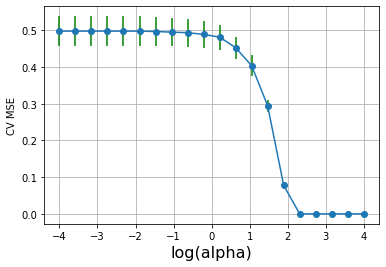

In [51]:
print("best mean cross-validation score: {:.3f}".format(-1*grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(alpha_vector),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(alpha)',fontsize=16)
plt.ylabel('CV MSE')
plt.grid()
plt.show()

In [52]:
#METRICAS EN TEST

from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)

mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names_test,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.53e+03
MSE Modelo Lasso (test) : 2.41e+07
RMSE Modelo Lasso (train): 39.1
RMSE Modelo Lasso (test) : 4.91e+03
Zipcode 0.00584596363762939
Latitude -0.4357000638299947
Longitude 113.34426476890451
Property Type 11.936443820164891
Room Type 0.10103419225966244
Accommodates -29.725979637396463
Bathrooms 5.917002225203204
Bedrooms -12.3491034109852
Price 2.0292478504211657
Guests Included 0.10913541598882961
Extra People -0.2173807473400688
Review Scores Rating 0.28100347477029775
Cancellation Policy -0.4237344842818253
bedrooms_squared -4.45704616935423
bed_bath_rooms 18.81217136286666


In [ ]:
Con Lasso , mejoramoss el overfiting al disminuir la complejidad.

C)BAGGING REGRESSOR

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................base_estimator__max_depth=1; total time=   0.7s
[CV] END ........................base_estimator__max_depth=1; total time=   0.7s
[CV] END ........................base_estimator__max_depth=1; total time=   0.6s
[CV] END ........................base_estimator__max_depth=1; total time=   0.6s
[CV] END ........................base_estimator__max_depth=1; total time=   0.6s
[CV] END ........................base_estimator__max_depth=2; total time=   1.0s
[CV] END ........................base_estimator__max_depth=2; total time=   1.0s
[CV] END ........................base_estimator__max_depth=2; total time=   1.0s
[CV] END ........................base_estimator__max_depth=2; total time=   1.0s
[CV] END ........................base_estimator__max_depth=2; total time=   1.0s
[CV] END ........................base_estimator__max_depth=3; total time=   1.3s
[CV] END ........................base_estimator_

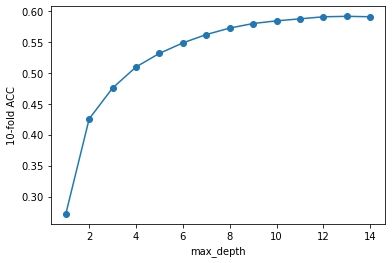

In [53]:
#CREACION Y ENTRENAMIENTO DEL MODELO

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'base_estimator__max_depth': maxDepth} #  {'max_depth': maxDepth, 'n_estimators': [100, 200, 500, 1000]}

grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

El máximo valor aparece en 13, pero 11-12-13 es practicamente el mismo, así que nos quedamos con 11.

In [54]:
maxDepthOptimo = 11#grid.best_params_['max_depth']
bagModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.806455646083805
Test:  -2.2510424915617144


CONCLUSIONES: Podemos concluir que son malos modelos pues los valores de train y de test son muy distintos, incluso los de test son negativos!!!!Lo podemos achacar a un fuerte Overfiting.
¿Podriamos haber utilizado el método de filtrado f_regression?